In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,auc,accuracy_score
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
con = sqlite3.connect("drive/Colab Notebooks/database.sqlite") 
filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, con) 
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative

In [0]:
import pickle
def savetofile(obj,filename):
    pickle.dump(obj,open(filename+".p","wb"))
def openfromfile(filename):
    temp = pickle.load(open(filename+".p","rb"))
    return temp

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


In [0]:
!pip3 install gensim

In [9]:
filtered_data


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,positive,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,positive,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,positive,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,positive,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,positive,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [7]:
import nltk
nltk.download('stopwords')
sno=nltk.stem.SnowballStemmer('english')
stop = set(stopwords.words('english'))
def cleanhtml(sentence):
  cleanr=re.compile('<.*?>')
  cleantext=re.sub(cleanr,' ',sentence)
  return cleantext
def cleanpunc(sentence):
  cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
  cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned) 
  return cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{"doesn't", 'yours', 'o', 'those', 'themselves', "needn't", 'have', 'here', 'myself', 'on', 'them', "haven't", 'then', 'while', 'as', 'again', 'own', 'mightn', "you're", 'wouldn', 'my', 'hers', 'am', 'not', 'aren', 's', 'into', 'it', 'do', 'having', 'i', 'didn', 'between', 'an', 'down', 've', 'some', "aren't", 'were', 'has', 'which', "wasn't", 'above', 'wasn', 'ma', 'up', 'off', 'him', "won't", "should've", 'why', 'her', 'that', 'other', 'from', 'both', 'but', 'ourselves', 'such', 'does', 'if', "don't", 'the', 'haven', 'about', 'by', 'be', 'under', 'nor', 'itself', 'at', 'herself', 'weren', 'ain', "hasn't", 'who', "couldn't", 'for', 'too', 'y', 'all', "shan't", 'what', "it's", 'until', "isn't", 'doesn', 'where', 'now', 're', 'needn', 'further', 'so', 'will', 'm', 'did', 'was', 'doing', 'same', 'than', 'yourselves', "mustn't", 'himself', 'don', 'had', 'there', 'hasn', 'll', 'an

In [0]:
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
final = sorted_data.drop_duplicates(subset= { 'UserId', 'ProfileName', 'Time',  'Text'})

In [0]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

# Time based splitting

In [0]:
import datetime
from tqdm import tqdm

In [0]:
final['Time'] = final['Time'].map(lambda t:datetime.datetime.fromtimestamp(int(t)).strftime('%Y-%m-%d %H:%M:%S'))

In [12]:
final["Time"].head()

138706    1999-10-08 00:00:00
138688    2007-11-11 00:00:00
138689    2007-10-04 00:00:00
138690    2004-02-06 00:00:00
138691    2002-04-10 00:00:00
Name: Time, dtype: object

In [0]:
final=final.sort_values('Time',axis=0,kind="quicksort", ascending=True).reset_index(drop=True)

In [14]:
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in tqdm(final['Text'].values):
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1
      
  


100%|██████████| 364171/364171 [08:22<00:00, 724.02it/s]


In [0]:
savetofile(final_string,'final_string')

In [0]:
savetofile(all_positive_words,'all_positive_words')

In [0]:
savetofile(all_negative_words,'all_negative_words')

In [13]:
len(final_string)

364171

In [0]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")

In [0]:
final_sample=final['CleanedText'].values[0:30000]
final_score=final['Score'].values[0:30000]

In [20]:
freq_dist_positive=nltk.FreqDist(all_positive_words)
freq_dist_negative=nltk.FreqDist(all_negative_words)
print("Most Common Positive Words : ",freq_dist_positive.most_common(20))
print("Most Common Negative Words : ",freq_dist_negative.most_common(20))

Most Common Positive Words :  [(b'like', 139429), (b'tast', 129047), (b'good', 112766), (b'flavor', 109624), (b'love', 107357), (b'use', 103888), (b'great', 103870), (b'one', 96726), (b'product', 91033), (b'tri', 86791), (b'tea', 83888), (b'coffe', 78814), (b'make', 75107), (b'get', 72125), (b'food', 64802), (b'would', 55568), (b'time', 55264), (b'buy', 54198), (b'realli', 52715), (b'eat', 52004)]
Most Common Negative Words :  [(b'tast', 34585), (b'like', 32330), (b'product', 28218), (b'one', 20569), (b'flavor', 19575), (b'would', 17972), (b'tri', 17753), (b'use', 15302), (b'good', 15041), (b'coffe', 14716), (b'get', 13786), (b'buy', 13752), (b'order', 12871), (b'food', 12754), (b'dont', 11877), (b'tea', 11665), (b'even', 11085), (b'box', 10844), (b'amazon', 10073), (b'make', 9840)]


# FUNCTION FOR knn

In [0]:

def KNNCLASSIFIER(X_train,Y_train,X_test,Y_test,optimum_k):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

    from sklearn.neighbors import KNeighborsClassifier
    clf=KNeighborsClassifier(n_neighbors=optimum_k,algorithm='brute')
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_test)
    print(' accuracy with k =',optimum_k,' is ' ,np.round((accuracy_score(Y_test, pred)*100),decimals = 2))
    print('F1 score with k=',optimum_k,' is ' , np.round((f1_score(Y_test, pred,average= 'macro')*100),decimals = 2))
    print('Recall with k =',optimum_k,' is ' , np.round((recall_score(Y_test, pred,average= 'macro')*100),decimals = 2))
    print('Precision with k =',optimum_k,' is ' , np.round((precision_score(Y_test, pred,average= 'macro')*100),decimals = 2))
    print ('\n Classification report  with k =',optimum_k,' is \n ' , classification_report(Y_test,pred)) 
   
    df_cm = pd.DataFrame(confusion_matrix(Y_test, pred), range(2),range(2))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 18}, fmt='g')
    print("**************************")
    print("train_score is",clf.score(X_train,Y_train))
    print("***************************")
    print("test_score is",clf.score(X_test,Y_test))

In [0]:
def KNNCLASSIFIERwithKDTREE(X_train,Y_train,X_test,Y_test,optimum_k):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

    from sklearn.neighbors import KNeighborsClassifier
    clf=KNeighborsClassifier(n_neighbors=optimum_k,algorithm='kd_tree')
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_test)
    print(' accuracy with k =',optimum_k,' is ' ,np.round((accuracy_score(Y_test, pred)*100),decimals = 2))
    print('F1 score with k=',optimum_k,' is ' , np.round((f1_score(Y_test, pred,average= 'macro')*100),decimals = 2))
    print('Recall with k =',optimum_k,' is ' , np.round((recall_score(Y_test, pred,average= 'macro')*100),decimals = 2))
    print('Precision with k =',optimum_k,' is ' , np.round((precision_score(Y_test, pred,average= 'macro')*100),decimals = 2))
    print ('\n Classification report  with k =',optimum_k,' is \n ' , classification_report(Y_test,pred)) 
   
    df_cm = pd.DataFrame(confusion_matrix(Y_test, pred), range(2),range(2))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 18}, fmt='g')
    print("**************************")
    print("train_score is",clf.score(X_train,Y_train))
    print("***************************")
    print("test_score is",clf.score(X_test,Y_test))

# CROSS VALIDATION FOR  OPTIMAL K

In [0]:
def optimal_k(X_train,Y_train):
    List = list(range(0,20))
    neighbors = list(filter(lambda x: x % 2 != 0, List))
    
    lb = preprocessing.LabelBinarizer()
    Y_train = np.array([number[0] for number in lb.fit_transform(Y_train)])
    cv_scores = []
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.cross_validation import cross_val_score

    for k in tqdm(neighbors):
     
      knn = KNeighborsClassifier(n_neighbors=k)
      scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='f1')
      cv_scores.append(scores.mean())

    MSE = [1 - x for x in cv_scores]

    optimal_k = neighbors[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)


    plt.figure(figsize=(10,6))
    plt.plot(list(filter(lambda x: x % 2 != 0, List)),MSE,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

    print("the misclassification error for each k value is : ", np.round(MSE,3))
    
    return optimal_k

# Bag of words -(LINEAR CLASSIFIER)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(final_sample,final_score,test_size=0.3,shuffle=False)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(ngram_range=(1,1))
Vocabulary = count_vect.fit_transform(X_train)


In [0]:
bow_X_train=count_vect.transform(X_train)
bow_X_test=count_vect.transform(X_test)

In [0]:
from sklearn import preprocessing 
bow_X_train= preprocessing.normalize(bow_X_train)
bow_X_test = preprocessing.normalize(bow_X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
100%|██████████| 10/10 [03:14<00:00, 19.90s/it]


The optimal number of neighbors is 11.
the misclassification error for each k value is :  [0.078 0.061 0.057 0.055 0.055 0.055 0.056 0.056 0.056 0.057]


11

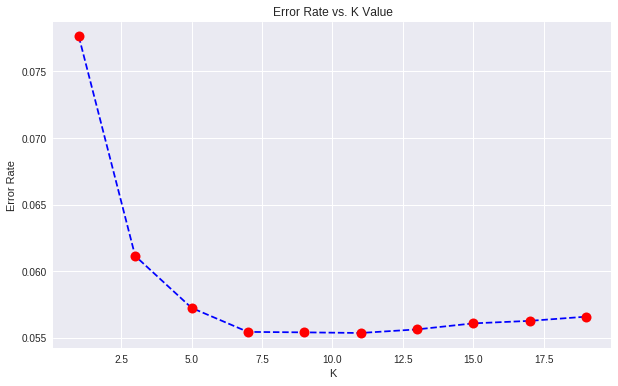

In [27]:
optimal_k(bow_X_train,Y_train)

# KNEIGHBORS CLASSIFIER for BOW

 accuracy with k = 11  is  90.12
F1 score with k= 11  is  54.1
Recall with k = 11  is  53.55
Precision with k = 11  is  83.46

 Classification report  with k = 11  is 
               precision    recall  f1-score   support

   negative       0.77      0.07      0.13       937
   positive       0.90      1.00      0.95      8063

avg / total       0.89      0.90      0.86      9000

**************************
train_score is 0.9013809523809524
***************************
test_score is 0.9012222222222223


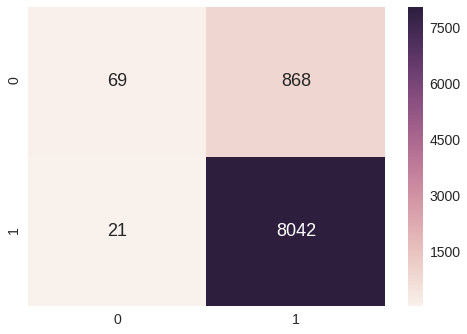

In [28]:
 KNNCLASSIFIER(bow_X_train,Y_train,bow_X_test,Y_test,11)

In [0]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=300)

Vocabulary = tsvd.fit_transform(bow_X_train)
bow_X_Train_tsvd=tsvd.transform(bow_X_train)
bow_X_Test_tsvd = tsvd.transform(bow_X_test)

In [29]:
bow_X_Train_tsvd.shape

(21000, 300)

 accuracy with k = 11  is  89.13
F1 score with k= 11  is  54.87
Recall with k = 11  is  53.99
Precision with k = 11  is  65.54

 Classification report  with k = 11  is 
               precision    recall  f1-score   support

   negative       0.41      0.10      0.16       937
   positive       0.90      0.98      0.94      8063

avg / total       0.85      0.89      0.86      9000

**************************
train_score is 0.8970952380952381
***************************
test_score is 0.8913333333333333


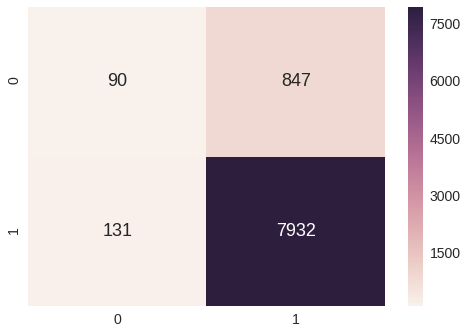

In [30]:
KNNCLASSIFIERwithKDTREE(bow_X_Train_tsvd,Y_train,bow_X_Test_tsvd,Y_test,11)

## Linear Classifier for TFIDF

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(final_sample,final_score,test_size=0.3,shuffle=False)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
Vocabulary = tfidf_vect.fit_transform(X_train)


In [0]:
tfidf_X_train=tfidf_vect.transform(X_train)
tfidf_X_test=tfidf_vect.transform(X_test)

In [0]:
from sklearn import preprocessing 
tfidf_X_train= preprocessing.normalize(tfidf_X_train)
tfidf_X_test = preprocessing.normalize(tfidf_X_test)

In [35]:
tfidf_X_train.shape

(21000, 18689)

100%|██████████| 10/10 [03:18<00:00, 20.34s/it]


The optimal number of neighbors is 9.
the misclassification error for each k value is :  [0.081 0.06  0.055 0.055 0.054 0.055 0.055 0.055 0.055 0.055]


9

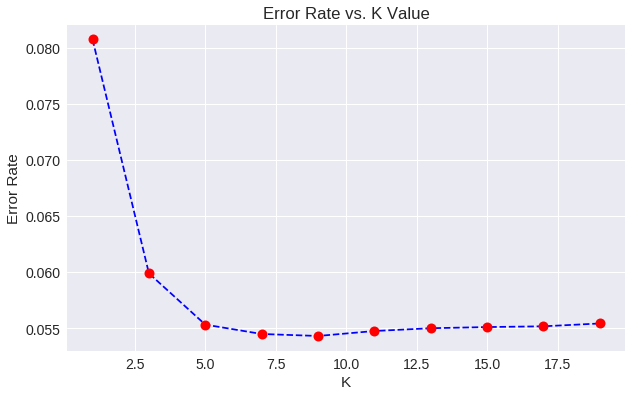

In [35]:
optimal_k(tfidf_X_train,Y_train)

 accuracy with k = 9  is  90.28
F1 score with k= 9  is  55.31
Recall with k = 9  is  54.25
Precision with k = 9  is  85.39

 Classification report  with k = 9  is 
               precision    recall  f1-score   support

   negative       0.80      0.09      0.16       937
   positive       0.90      1.00      0.95      8063

avg / total       0.89      0.90      0.87      9000

**************************
train_score is 0.9051904761904762
***************************
test_score is 0.9027777777777778


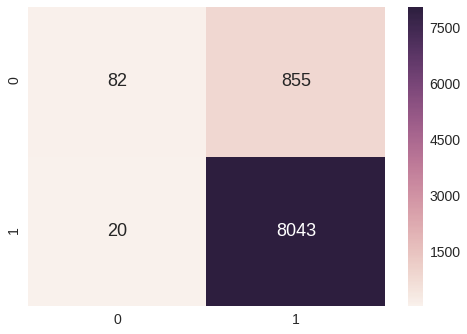

In [36]:
 KNNCLASSIFIER(tfidf_X_train,Y_train,tfidf_X_test,Y_test,9)

In [0]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=300)

Vocabulary = tsvd.fit_transform(tfidf_X_train)
tfidf_X_Train_tsvd=tsvd.transform(tfidf_X_train)
tfidf_X_Test_tsvd = tsvd.transform(tfidf_X_test)

 accuracy with k = 9  is  88.8
F1 score with k= 9  is  54.15
Recall with k = 9  is  53.52
Precision with k = 9  is  62.71

 Classification report  with k = 9  is 
               precision    recall  f1-score   support

   negative       0.35      0.09      0.14       937
   positive       0.90      0.98      0.94      8063

avg / total       0.85      0.89      0.86      9000

**************************
train_score is 0.8999047619047619
***************************
test_score is 0.888


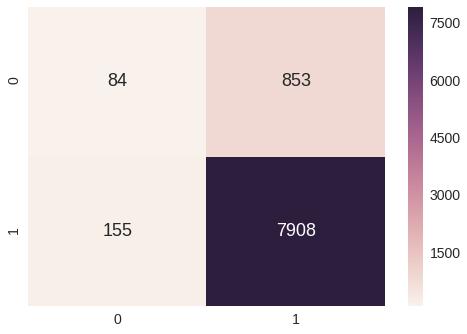

In [37]:
KNNCLASSIFIERwithKDTREE(tfidf_X_Train_tsvd ,Y_train,tfidf_X_Test_tsvd,Y_test,9)

# Word 2 vec

In [0]:
from sklearn.model_selection import train_test_split

X_TRAIN,Y_TRAIN,X_TEST,Y_TEST = train_test_split(final_sample,final_score,test_size=0.3,shuffle=False)

In [23]:
i=0
list_of_sent1=[]
for sent in tqdm(X_TRAIN):
    
    list_of_sent1.append(sent.split())

100%|██████████| 21000/21000 [00:00<00:00, 39103.65it/s]


In [0]:
w2v_model = gensim.models.Word2Vec(list_of_sent1,min_count=5,size=50, workers=4)

In [31]:
w2v_model.most_similar("like")

[('weird', 0.7680763602256775),
 ('prefer', 0.7477862238883972),
 ('normal', 0.7422328591346741),
 ('nasti', 0.733617901802063),
 ('horribl', 0.7307159304618835),
 ('aw', 0.729770302772522),
 ('real', 0.7209131717681885),
 ('think', 0.7150565385818481),
 ('sort', 0.714433491230011),
 ('bland', 0.7003095746040344)]

In [0]:
w2v_words = list(w2v_model.wv.vocab)


In [33]:
sent_vectors = []; 
for sent in tqdm(list_of_sent1): 
    sent_vec = np.zeros(50)
    cnt_words =0; 
    for word in sent:
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 21000/21000 [00:20<00:00, 1012.84it/s]

21000
50


In [0]:
savetofile(sent_vectors,"sent_vectors")

# AVG WORD2VEC

In [0]:
final_w2v_sample = np.array(sent_vectors)

final_score_vec=final['Score'].values[0:len(final_w2v_sample)]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(final_w2v_sample,final_score_vec,test_size=0.3,shuffle=False)

In [0]:
from sklearn import preprocessing 
avgw2v_X_train= preprocessing.normalize(X_train)
avgw2v_X_test = preprocessing.normalize(X_test)

100%|██████████| 10/10 [03:36<00:00, 24.28s/it]


The optimal number of neighbors is 9.
the misclassification error for each k value is :  [0.08  0.062 0.058 0.056 0.054 0.055 0.055 0.055 0.055 0.055]


9

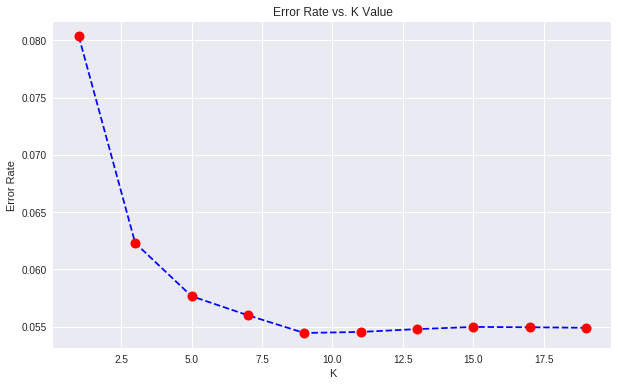

In [41]:
optimal_k(avgw2v_X_train,Y_train)

 accuracy with k = 9  is  89.14
F1 score with k= 9  is  57.59
Recall with k = 9  is  55.83
Precision with k = 9  is  71.53

 Classification report  with k = 9  is 
               precision    recall  f1-score   support

   negative       0.53      0.13      0.21       694
   positive       0.90      0.99      0.94      5606

avg / total       0.86      0.89      0.86      6300

**************************
train_score is 0.9096598639455782
***************************
test_score is 0.8914285714285715


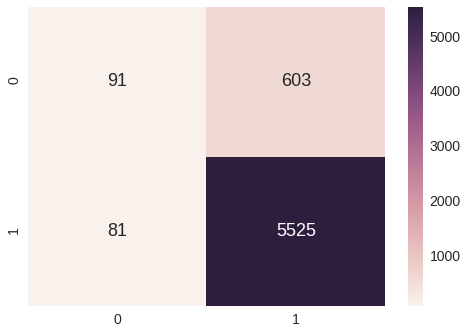

In [42]:
KNNCLASSIFIER(avgw2v_X_train,Y_train,avgw2v_X_test,Y_test,9)

 accuracy with k = 9  is  89.14
F1 score with k= 9  is  57.59
Recall with k = 9  is  55.83
Precision with k = 9  is  71.53

 Classification report  with k = 9  is 
               precision    recall  f1-score   support

   negative       0.53      0.13      0.21       694
   positive       0.90      0.99      0.94      5606

avg / total       0.86      0.89      0.86      6300

**************************
train_score is 0.9096598639455782
***************************
test_score is 0.8914285714285715


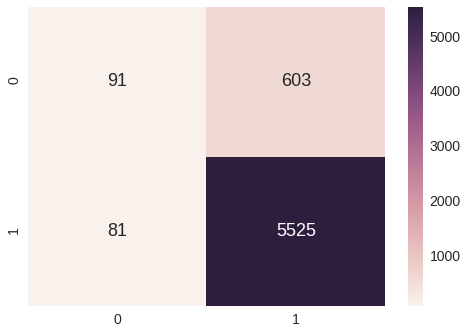

In [47]:
KNNCLASSIFIERwithKDTREE(avgw2v_X_train,Y_train,avgw2v_X_test,Y_test,9)

In [45]:
avgw2v_X_train.shape

(14700, 50)

# TFIDF WORD 2 Vec

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [0]:
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(final['CleanedText'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [29]:
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent1): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#            
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 21000/21000 [00:31<00:00, 660.13it/s]


In [0]:
savetofile (tfidf_sent_vectors,'tfidf_sent_vectors')

In [0]:
final_tfidf_sample=tfidf_sent_vectors
final_score_vec=final['Score'].values[0:len(final_tfidf_sample)]

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(final_tfidf_sample,final_score_vec,test_size=0.3,shuffle=False)

In [0]:
from sklearn import preprocessing
tfidf_w2v_X_train= preprocessing.normalize(X_train)
tfidf_w2v_X_test= preprocessing.normalize(X_test)

100%|██████████| 10/10 [03:50<00:00, 24.28s/it]


The optimal number of neighbors is 17.
the misclassification error for each k value is :  [0.084 0.064 0.06  0.058 0.057 0.057 0.057 0.056 0.056 0.056]


17

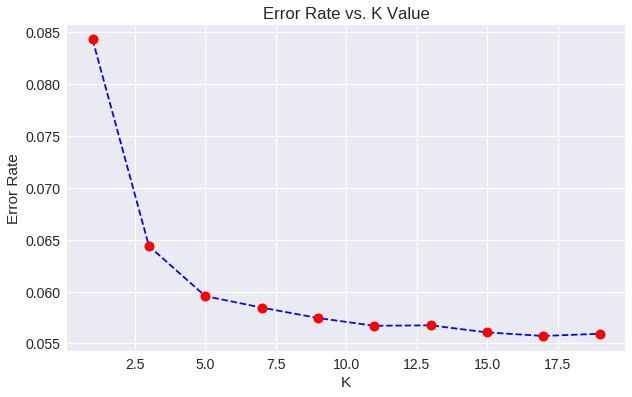

In [54]:
optimal_k(tfidf_w2v_X_train,Y_train)

 accuracy with k = 17  is  89.21
F1 score with k= 17  is  55.95
Recall with k = 17  is  54.73
Precision with k = 17  is  72.62

 Classification report  with k = 17  is 
               precision    recall  f1-score   support

   negative       0.55      0.11      0.18       694
   positive       0.90      0.99      0.94      5606

avg / total       0.86      0.89      0.86      6300

**************************
train_score is 0.9002721088435374
***************************
test_score is 0.8920634920634921


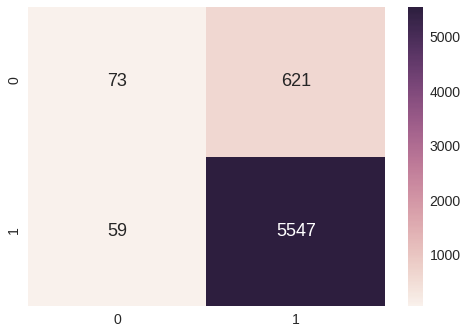

In [55]:
KNNCLASSIFIER(tfidf_w2v_X_train,Y_train,tfidf_w2v_X_test,Y_test,17)

 accuracy with k = 17  is  89.1
F1 score with k= 17  is  54.83
Recall with k = 17  is  54.04
Precision with k = 17  is  71.37

 Classification report  with k = 17  is 
               precision    recall  f1-score   support

   negative       0.53      0.09      0.15       694
   positive       0.90      0.99      0.94      5606

avg / total       0.86      0.89      0.86      6300

**************************
train_score is 0.8991156462585034
***************************
test_score is 0.8909523809523809


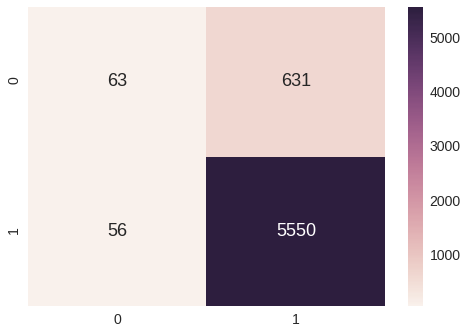

In [37]:
KNNCLASSIFIERwithKDTREE(tfidf_w2v_X_train,Y_train,tfidf_w2v_X_test,Y_test,17)

# PERFORMANCE TABLE FOR KNN with BRUTE FORCE

|VECTORIZER | OPTIMAL K | TRAIN SCORE | TEST SCORE |
| --- | --- | --- | --- |
| BOW | 11 | 0.90 | 0.90 |
| tfidf | 9 | 0.90 | 0.90 |
| avg w2v | 9 | 0.90 | 0.89 |
| tfidf w2v | 17 | 0.90 | 0.89 |


# PERFORMANCE TABLE FOR KNN with KDTREE

|VECTORIZER | OPTIMAL K | TRAIN SCORE | TEST SCORE |
| --- | --- | --- | --- |
| BOW | 11 | 0.89 | 0.89 |
| tfidf | 9 | 0.89 | 0.88 |
| avg w2v | 9 | 0.90 | 0.89 |
| tfidf w2v | 17 | 0.89 | 0.89 |